In [1]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from std_msgs.msg import String
#from deepface import DeepFace

In [2]:
import sys
#sys.path.remove('/opt/ros/melodic/lib/python2.7/dist-packages')## SI NO TIENEN ROS COMENTEN ESTA LINEA
import cv2
from cv_bridge import CvBridge, CvBridgeError
bridge = CvBridge()


In [ ]:

from deepface import DeepFace

In [3]:
import rospy
import face_recognition
from sensor_msgs.msg import Image , LaserScan , PointCloud2
rospy.init_node("face_recognition")
from hmm_navigation.msg import NavigateActionGoal , NavigateActionResult   ###BETA OPTIONAL


In [ ]:

from  smach_utils2 import *

In [ ]:

protoFile = "/home/takeshi/openpose/models/pose/body_25/pose_deploy.prototxt"
weightsFile = "/home/takeshi/openpose/models/pose/body_25/pose_iter_584000.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [ ]:
from rospkg import RosPack

rp = RosPack()
path_for_faces = rp.get_path('config_files')+'/faces_for_recognition/'

In [3]:
image=rgbd.get_image()
plt.imshow(image)

NameError: name 'rgbd' is not defined

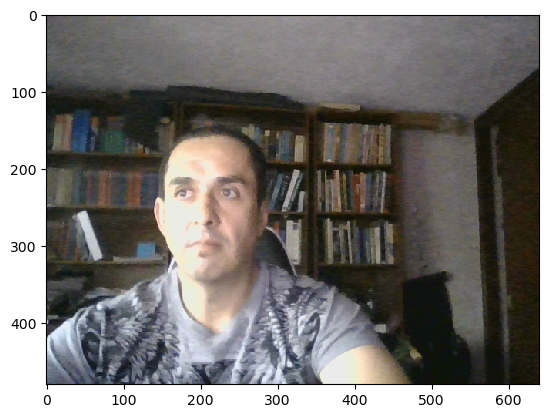

In [4]:
#rospy.sleep(5)
data = rospy.wait_for_message("/usb_cam/image_raw",Image,timeout=5) ### FOR DEBUGGING: WHEN USING ROBOT PLEASE CHANGE THIS TOPIC ACCORDINGLY
cv2_img = bridge.imgmsg_to_cv2(data)#, "bgr8")
plt.imshow(cv2_img)
image=np.copy(cv2_img)


In [ ]:
frame=image
inHeight = frame.shape[0]
inWidth = frame.shape[1]


# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

# Set the prepared object as the input blob of the network
net.setInput(inpBlob)

output = net.forward()

In [ ]:
output.shape

In [ ]:
frame2 = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
frame = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

In [ ]:
H = output.shape[2]
W = output.shape[3]
threshold=0.5
# Empty list to store the detected keypoints
points = []
for i in range(10):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    

    # Find global maxima of the probMap.
    _, prob,_, point = cv2.minMaxLoc(probMap)
    print (point, prob)

    # Scale the point to fit on the original image
    x = (inWidth * point[0]) / W
    y = (inHeight * point[1]) / H

    if prob > threshold :
        cv2.circle(frame, (int(x), int(y)), 1, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.51, (0, 0, 255), 1, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

cv2.imshow("Output-Keypoints",frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
i = 1
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (inWidth, inHeight))



#plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#plt.imshow(probMap, alpha=0.6)

In [ ]:
mask=np.where(probMap>0.3)
npmask=np.asarray(mask).T



In [ ]:
dfs = DeepFace.find(image,path_for_faces)

In [ ]:
points_data=rgbd.get_points()


In [ ]:
def probmap_to_3d_mean(points_data,probMap, thres_prob=0.3):

    mask=np.where(probMap>thres_prob)
    npmask=np.asarray(mask).T

    npmask.shape
    xyz=[]
    if len (npmask)>1:
        for a in npmask:
            ix,iy=a[0],a[1]
            aux=(np.asarray((points_data['x'][ix,iy],points_data['y'][ix,iy],points_data['z'][ix,iy])))
            #print (aux)
            if np.isnan(aux[0]) or np.isnan(aux[1]) or np.isnan(aux[2]):
                    'reject point'
            else:
                xyz.append(aux)

    xyz=np.asarray(xyz)
    #print (xyz)
    cent=xyz.mean(axis=0)
    return cent


In [ ]:
cent=probmap_to_3d_mean(rgbd.get_points(),probMap,0.3 )

In [ ]:
tf_man.pub_static_tf(pos=cent,point_name='neck', ref= 'head_rgbd_sensor_link',)

In [ ]:
def point_2D_3D(points_data, px_y, px_x):
    ##px pixels /2D world  P1 3D world
    ## rgbd pOINTCLOUD2 numpify
    P = np.asarray((points_data[px_y, px_x]['x'], points_data[px_y, px_x]['y'], points_data[px_y, px_x]['z']))
    return P


In [ ]:
probMap
npmask= np.where(probMap<0.1,0,probMap)

In [ ]:
npmask.shape

In [ ]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from std_msgs.msg import String
#from deepface import DeepFace
from  smach_utils2 import *
data = rospy.wait_for_message("/usb_cam/image_raw",Image,timeout=5) ### FOR DEBUGGING: WHEN USING ROBOT PLEASE CHANGE THIS TOPIC ACCORDINGLY
cv2_img = bridge.imgmsg_to_cv2(data)#, "bgr8")
plt.imshow(cv2_img)
image=np.copy(cv2_img)


In [5]:
from face_recog.msg import *

In [6]:
from face_recog.srv import *

In [7]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)

rospy.wait_for_service('recognize_face')

In [ ]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)
rospy.wait_for_service('new_face')
rospy.wait_for_service('analyze_face')



In [8]:
train_new_face = rospy.ServiceProxy('new_face', RecognizeFace)    
recognize = rospy.ServiceProxy('recognize_face', RecognizeFace)    
analyze = rospy.ServiceProxy('analyze_face', RecognizeFace)    

In [ ]:
cv2_img_bgr= cv2.imread('/home/oscar/Pictures/meandbere.png')
#cv2_img_bgr= cv2.imread('/home/oscar/Pictures/einieandwifi.png')
cv2_img = cv2.cvtColor(cv2_img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(cv2_img)

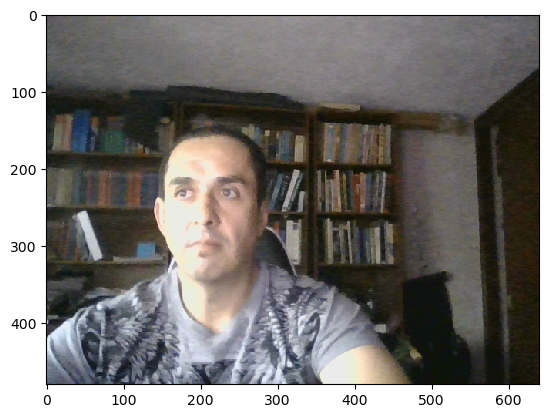

In [9]:
plt.imshow(cv2_img)

In [10]:
req=RecognizeFaceRequest()

strings=Strings()
string_msg= String()
string_msg.data='any'
req.Ids.ids.append(string_msg)

img_msg=bridge.cv2_to_imgmsg(cv2_img)
#img_msg=bridge.cv2_to_imgmsg(np.load('image.npy'))
req.in_.image_msgs.append(img_msg)
res=recognize(req)
print(res)
name=res.Ids.ids
#res = analyze_face(req)
#print(res, name)

Ds: 
  data: [0.6649350523948669]
Angs: 
  data: [184.0, 287.0, 339.0, 132.0]
Ids: 
  ids: 
    - 
      data: "Jack"


In [11]:
results=[]
for chars in res.Ids.ids:
    results.append(chars.data)

In [ ]:
boundRect

In [ ]:
analyze_face_from_image(image, name[0].data)

In [ ]:
results=[]
for chars in res.Ids.ids: # Results from analyze service
    results.append(chars.data)
results
name= 'Jack'
pronoun='She'
if results[0]=='Man':pronoun='He'
    
takeshi_line= name+' has arrived A '+results[0]+' I believe '+pronoun +' is  around '+results[-1]+' years old. I would say he is a bit '+results[2]+ ' And I would guess '+pronoun+' is of '+ results[1]+' descent.'
print (takeshi_line)

In [ ]:
boundRect=np.asarray(res.Angs.data).astype('int')
#plt.imshow(cv2_img[boundRect[0]:boundRect[2],boundRect[3]:boundRect[1]]                )
plt.imshow(cv2_img[boundRect[4]:boundRect[6],boundRect[7]:boundRect[5]]                )


In [ ]:
plt.imshow(cv2_img)

In [ ]:
name= 'Jack'
pronoun='She'
if results[0]=='Man':pronoun='He'
    
takeshi_line= name+' has arrived A '+results[0]+' I believe '+pronoun +' is  around '+results[-1]+' years old. I would say he is a bit '+results[2]+ ' And I would guess he is of '+ results[1]+' descent.'


In [ ]:
pronoun='She'
if results[0]=='Man':pronoun='He'
    

In [ ]:
boundRect=np.asarray(res.Angs.data).astype('int')
plt.imshow(cv2_img[boundRect[0]:boundRect[1],boundRect[3]:boundRect[2]]                )

In [ ]:
name=res.Ids.ids[0].data
#talk('I found you, I Think you are .' + name)
#print(res.Angs.data)
points = rgbd.get_points()
boundRect=np.asarray(res.Angs.data).astype('int')                
trans = bbox_3d_mean(points, boundRect)
print(trans)
#############################################################################################
##############################################################################################
tf_man.pub_static_tf(pos=trans, point_name=name, ref='head_rgbd_sensor_link')

rospy.sleep(0.3)
tf_man.change_ref_frame_tf(res.Ids.ids[0].data)


try:
    trans,quat = tf_man.getTF(target_frame=name)
except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
    print ( 'No TF FOUND')
omni_base.move_d_to(1.5, name )
print (trans)
#head.absolute(*trans)

talk (name +'... I will lead you to the living room, please follow me')

return 'succ'

In [ ]:

robot, robotquat = tf_man.getTF('base_link')
new_yaw = (tf.transformations.euler_from_quaternion(robotquat)[2]+np.pi) 
print (new_yaw)
        # go to living room an do a 180
res = omni_base.move_base(robot[0], robot[1], new_yaw,10)


In [ ]:
bbox_3d_mean(points,boundRect )

In [ ]:
bbox_3d_mean(points[boundRect[0]:boundRect[1],boundRect[3]:boundRect[2]] )

In [ ]:
string_msg.data='Jack'
res=train_new_face(req)  ### FOR TRAINING! IF NAME IS REPETAED WILL CRASH
res

In [ ]:
type (boundRect), 

In [ ]:
from smach_utils2 import *

In [ ]:
points=rgbd.get_points()

In [ ]:
def bbox_3d_mean(points,bbox):
    
    xyz=[]
    bbox[0]
    for i in np.arange((int)(bbox[0]),(int)(bbox[0])+(int)(bbox[2])):
        for j in np.arange((int)(bbox[1]),(int)(bbox[1])+(int)(bbox[3])):
            aa=np.asarray(points[['x','y','z']][i,j])
            if np.isnan(np.asarray((aa['x'],aa['y'],aa['z']))).sum() ==0:                   
                xyz.append(np.asarray((aa['x'],aa['y'],aa['z'])) )
    return np.asarray(xyz).mean(axis=0)

In [ ]:
def bbox_3d_mean(points,bbox):
    
    xyz=[]

    for i in np.arange((int)(21.0),(int)(21.0)+(int)(187.0)):
        for j in np.arange((int)(178.0),(int)(178.0)+(int)(344.0)):
            aa=np.asarray(points[['x','y','z']][i,j])
            if np.isnan(np.asarray((aa['x'],aa['y'],aa['z']))).sum() ==0:                   
                xyz.append(np.asarray((aa['x'],aa['y'],aa['z'])) )

In [ ]:
x,y,z=xyzz.mean(axis=0)
x,y,z

In [ ]:
bbox=(21,178,187,344)

In [ ]:
trans=bbox_3d_mean(points,bbox)
trans

In [ ]:
trans=xyzz.mean(axis=0)
trans[2]+=600
trans

In [ ]:
points

In [ ]:
aux=(points[['x','y','z']][-20,410])
#np.isnan(aux)
aa=np.asarray(aux)
np.isnan(np.asarray((aa['x'],aa['y'],aa['z']))).sum()==0

In [ ]:
21.0, 178.0, 187.0, 344.0
for i 

aux=(points[['x','y','z']][-20,410])

In [ ]:
plt.imshow (points['x'])

In [ ]:
data=(21.0, 178.0, 187.0, 344.0)
data

In [ ]:
try:
    res=DeepFace.extract_faces(image )
    print ('face found')
    dfs = DeepFace.find(image,path_for_faces)
    print('id',dfs[0]['identity'].iloc[0].split('/')[-2])
except(ValueError): 
    print('No Face')

In [ ]:
#### DISPLAY IMAGE?#############3
#obj=res
pt1 = res[0]['facial_area']['x'],res[0]['facial_area']['y'] 
pt2=  res[0]['facial_area']['x']+res[0]['facial_area']['w'] , res[0]['facial_area']['y']+ res[0]['facial_area']['h']
img=cv2.rectangle(image, pt1,pt2, (0, 0, 255), 2)
img = cv2.putText(img, dfs[0]['identity'].iloc[0].split('/')[-2], pt1, cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (255, 0, 0), 2, cv2.LINE_AA)
   


In [ ]:
plt.imshow(cv2_img)

In [ ]:
plt.imshow(img)

In [ ]:
dfs = DeepFace.find(image,path_for_faces)
dfs[0]['identity'].iloc[0].split('/')[-2]

In [ ]:

dfs = DeepFace.find(image,path_for_faces)

In [ ]:
from deepface import DeepFace

In [ ]:
objs = DeepFace.analyze(image, 
        actions = ['age', 'gender', 'race', 'emotion']
)

In [ ]:
objs

In [ ]:
objs[0]['region']

In [ ]:
objs[0]['dominant_gender'],objs[0]['dominant_race'],objs[0]['dominant_emotion'],objs[0]['age']

In [ ]:
for st in (objs[0]['dominant_gender'],objs[0]['dominant_race'],objs[0]['dominant_emotion'],objs[0]['age']):
    print (st)

In [ ]:
objs[0]['age']

In [ ]:
from face_recog.msg import *

In [ ]:
from face_recog.srv import *

In [ ]:
def train_face(image, name):
    req=RecognizeFaceRequest()
    strings=Strings()
    string_msg= String()
    string_msg.data=name
    req.Ids.ids.append(string_msg)

    img_msg=bridge.cv2_to_imgmsg(image)
    req.in_.image_msgs.append(img_msg)
    res=train_new_face(req)
    return res.Ids.ids[0].data.split(' ')[0] == 'trained'

In [ ]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)

rospy.wait_for_service('recognize_face')

In [ ]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)
rospy.wait_for_service('new_face')


In [ ]:
train_new_face = rospy.ServiceProxy('new_face', RecognizeFace)    
recognize = rospy.ServiceProxy('recognize_face', RecognizeFace)    

In [ ]:
req=RecognizeFaceRequest()

strings=Strings()
string_msg= String()
string_msg.data='any'
req.Ids.ids.append(string_msg)

img_msg=bridge.cv2_to_imgmsg(cv2_img)
req.in_.image_msgs.append(img_msg)
res=recognize(req)
res

In [ ]:
plt.imshow(cv2_img)

In [ ]:
req=RecognizeFaceRequest()

strings=Strings()
string_msg= String()
string_msg.data='Jack'
req.Ids.ids.append(string_msg)

img_msg=bridge.cv2_to_imgmsg(image)
req.in_.image_msgs.append(img_msg)




In [ ]:
res=train_new_face(req)  ### FOR TRAINING! IF NAME IS REPETAED WILL CRASH
res

In [ ]:
import face_recognition

In [ ]:
face_recognition.face_locations(cv2_img)

In [ ]:
###################Using Navigation to get to a Distance from this face$$

In [ ]:
listener = tf.TransformListener()
broadcaster = tf.TransformBroadcaster()
pub_goal= rospy.Publisher('/navigate/goal', NavigateActionGoal, queue_size=1)

In [ ]:
d=res.Ds.data[0]
D_to_person=0.15
pose=np.zeros(3)
pose[2]+=d - D_to_person
quat=np.zeros(4)
quat[-1]=1
    

broadcaster.sendTransform(pose, quat,rospy.Time.now(), 'face','head_rgbd_sensor_link')
for i in range (10):
    try:
        goal_pose, quat=listener.lookupTransform( 'map','face', rospy.Time(0))
        print('yes tf')
        break
    except:
        print  ('No tf')
        rospy.sleep(0.2)

In [ ]:

goal_pose
goal= NavigateActionGoal()
goal.goal.x=goal_pose[0]
goal.goal.y=goal_pose[1]

goal.goal.timeout= 10
nav_res= NavigateActionResult()
pub_goal.publish(goal)

In [ ]:
image

In [ ]:
from smach_utils2 import *

In [ ]:
res= speech_recog_server()

In [ ]:
res.data

In [ ]:
res2=train_face(image,res.data)


In [ ]:
res2.Ids.ids[0].data.split(' ')[0] == 'trained'

In [ ]:
train_face(image,res.data)

In [ ]:
req

In [ ]:

from smach_utils2 import *
from rospkg import RosPack

In [ ]:
rp = RosPack()
path = rp.get_path('config_files')

In [ ]:
path

In [ ]:
from rospkg import RosPack

rp = RosPack()
path_for_faces = rp.get_path('config_files')+'/faces_for_recognition'


In [ ]:
path_for_faces

In [ ]:
path_for_faces = rp.get_path('config_files')

In [ ]:
for person in os.listdir(path_for_faces):
    print (person)

In [ ]:
import os
os.listdir(path_for_faces)[1]

In [ ]:
omni_base.move_base(1,1,np.pi,1)

In [ ]:
print (res)

In [ ]:
robot, robotquat = tf_man.getTF('base_link')
new_yaw = (tf.transformations.euler_from_quaternion(robotquat)[2]+np.pi)
print(new_yaw)
# go to living room an do a 180
res = omni_base.move_base(robot[0], robot[1], new_yaw)

In [ ]:
import human_detector

In [ ]:
#from segmentation.srv import Segmentation, SegmentationResponse 
from human_detector.srv import Human_detector ,Human_detectorResponse 

In [ ]:
cent

In [ ]:
res=Human_detectorResponse()
res.x= cent[0]
res.y= cent[1]
res.z= cent[2]

In [ ]:
hu

In [ ]:
res=human_detect_server.call()

In [ ]:
res

In [ ]:
xyz_cam=np.asarray((res.x,res.y,res.z))

In [ ]:
tf_man.pub_static_tf(pos=xyz_cam,point_name='face',ref="head_rgbd_sensor_rgb_frame")
tf_man.change_ref_frame_tf(point_name='face')

In [ ]:
omni_base.move_d_to(target_link='face')
head.to_tf('face')

In [ ]:
robot, robotquat = tf_man.getTF('base_link')
new_yaw = (tf.transformations.euler_from_quaternion(robotquat)[2]+np.pi)
print(new_yaw)

In [ ]:
res = omni_base.move_base(robot[0], robot[1], new_yaw)

In [ ]:
7%(2*np.pi)

In [ ]:

import numpy as np

In [ ]:
dfs = DeepFace.find(image,path_for_faces,enforce_detection=False)

In [ ]:

print('id',dfs[0]['identity'].iloc[2].split('/')[-2])


In [ ]:
#np.save('image.npy',image)
image=np.load('image.npy')

In [ ]:
DeepFace.extract_faces(image)

In [ ]:
line=analyze_face_from_image(image)

In [ ]:
type(line)

In [ ]:
line

In [ ]:
if line!=True:
    print('yey')

In [ ]:
len('')

In [ ]:
pub_potfields_goal = rospy.Publisher("/clicked_point",PointStamped,queue_size=10)


In [ ]:
rospy.sleep(5)
trans_dict= human_detect_server()
trans =[trans_dict.x,trans_dict.y,trans_dict.z]         ##FROM HUMAN FINDER OPEN POSE


In [ ]:
tf_man.pub_static_tf(pos=trans,point_name='goal',ref='head_rgbd_sensor_link')
tf_man.change_ref_frame_tf('goal')
pt,_=tf_man.getTF('goal')
head.to_tf('goal')
point= PointStamped()

point.point.x=pt[0]
point.point.y=pt[1]
point.point.z=0.0
pub_potfields_goal.publish(point)


In [ ]:
trans =[trans_dict.x,trans_dict.y,trans_dict.z]         ##FROM HUMAN FINDER OPEN POSE
trans

In [ ]:
tf_man.change_ref_frame_tf('goal')
pt,_=tf_man.getTF('goal')

In [ ]:
point= PointStamped()

point.point.x=pt[0]
point.point.y=pt[1]
point.point.z=0.0
pub_potfields_goal.publish(point)


In [ ]:
head.to_tf('goal')

In [ ]:
import face_recognition

In [ ]:
face_locations = face_recognition.face_locations(cv2_img)

In [ ]:
req=RecognizeFaceRequest()

strings=Strings()
string_msg= String()
string_msg.data='any'
req.Ids.ids.append(string_msg)

img_msg=bridge.cv2_to_imgmsg(cv2_img)
#img_msg=bridge.cv2_to_imgmsg(np.load('image.npy'))
req.in_.image_msgs.append(img_msg)
res=recognize(req)
print(res)
name=res.Ids.ids
#res = analyze_face(req)
#print(res, name)

In [ ]:
face_locations

In [ ]:
Angs=[]

In [ ]:
for face_location in face_locations:
    print (face_location[0])

In [ ]:
face_encodings = face_recognition.face_encodings(cv2_img, face_locations)

In [ ]:
len(face_encodings)

In [ ]:
for face_encoding in face_encodings:
    results = face_recognition.compare_faces(face_encodings, face_encoding)
    print (results)

In [ ]:
ids=[]

names=[]
for face_encoding in face_encodings:
    results = face_recognition.compare_faces(face_encodings, face_encoding)
    if any(results) !=True: names.append('unknown')
    else :print (results)

In [ ]:
results


In [ ]:
ids=[]
first= True

for person in os.listdir(path_for_faces):    
    if person[-3:]!='pkl':
        for example in os.listdir(path_for_faces+person):
            if first:
                first= False
                dataset_pic=face_recognition.load_image_file(path_for_faces+person+'/'+example)
                encodings = face_recognition.face_encodings(dataset_pic)

            else:
                dataset_pic = face_recognition.load_image_file(path_for_faces+person+'/'+example)
                encodings.append(face_recognition.face_encodings(dataset_pic)[0])
            ids.append(person)
ids=np.asarray(ids)

In [ ]:
from rospkg import RosPack

rp = RosPack()
path_for_faces = rp.get_path('config_files')+'/faces_for_recognition/'


In [ ]:
path_for_faces

In [ ]:
name=''

In [ ]:
res.Ids.ids

In [ ]:
ds_to_faces=[]
for i , idface in enumerate(res.Ids.ids):
    print (i,idface.data)
    ds_to_faces.append(res.Ds.data[i])    ##
    if (idface.data)==name :
        new_res= RecognizeFaceResponse()
        new_res.Ds.data= res.Ds.data[i]
        new_res.Angs.data= res.Angs.data[i:i+4]
        new_res.Ids.ids=res.Ids.ids[i].data
        print('return res,img',new_res)


        #print ('hit',idface.data, 'at' , res.Ds.data[i]  , 'meters')
        
        ds_to_faces=[]
        print('return res,img',i)
        break

if len (ds_to_faces)!=0:print ('closest',np.argmin(ds_to_faces))


In [ ]:
i=np.argmin(ds_to_faces       )
print('return res,img',i)

In [ ]:
res

In [ ]:
res= recognize_face(req)

        if res.Ids.ids[0].data == 'NO_FACE':
            print ('No face FOund Keep scanning')
            return None, None



        
        else:
            ds_to_faces=[]
            for i , idface in enumerate(res.Ids.ids):
                print (i,idface.data)
                ds_to_faces.append(res.Ds.data[i])    ##
                if (idface.data)==name :
                    new_res= RecognizeFaceResponse()
                    new_res.Ds.data= res.Ds.data[i]
                    new_res.Angs.data= res.Angs.data[i:i+4]
                    new_res.Ids.ids=res.Ids.ids[i].data
                    print('return res,img',new_res)
                    ds_to_faces=[]
                    return new_res , img


                    #print ('hit',idface.data, 'at' , res.Ds.data[i]  , 'meters')
                    
                    

            if len (ds_to_faces)!=0:
                i=np.argmin(ds_to_faces)
                new_res= RecognizeFaceResponse()
                new_res.Ds.data= res.Ds.data[i]
                new_res.Angs.data= res.Angs.data[i:i+4]
                new_res.Ids.ids='closest'
                print('return res,img',new_res)
                ds_to_faces=[]
                return new_res , img


In [ ]:
new_res= RecognizeFaceResponse()
new_res.Ds.data= res.Ds.data[i]
new_res.Angs.data= res.Angs.data[i:i+4]
new_res.Ids.ids=res.Ids.ids[i].data

In [18]:


    
print ('Got  image with shape',cv2_img.shape)

if res.Ids.ids[0].data == 'NO_FACE':
    print ('No face FOund Keep scanning')
    #return None, None
    



else:
    ds_to_faces=[]
    for i , idface in enumerate(res.Ids.ids):
        print (i,idface.data)
        ds_to_faces.append(res.Ds.data[i])    ##
        if (idface.data)==name :
            new_res= RecognizeFaceResponse()
            new_res.Ds.data= res.Ds.data[i]
            new_res.Angs.data= res.Angs.data[i:i+4]
            new_res.Ids.ids=res.Ids.ids[i].data
            print ('hit',idface.data, 'at' , res.Ds.data[i]  , 'meters')
            print('return res,img',new_res)
            ds_to_faces=[]
            #return new_res , img


            



    if len (ds_to_faces)!=0:
        i=np.argmin(ds_to_faces)
        new_res= RecognizeFaceResponse()
        new_res.Ds.data= res.Ds.data[i]
        new_res.Angs.data= res.Angs.data[i:i+4]
        new_res.Ids.ids=res.Ids.ids[i].data
        print('return res,img',new_res)
        ds_to_faces=[]
        #return new_res , img



Got  image with shape (480, 640, 3)
0 Jack
return res,img Ds: 
  data: 0.6649350523948669
Angs: 
  data: [184.0, 287.0, 339.0, 132.0]
Ids: 
  ids: "Jack"


In [17]:

new_res

Ds: 
  data: 0.6649350523948669
Angs: 
  data: [184.0, 287.0, 339.0, 132.0]
Ids: 
  ids: "Jack"